In [516]:
import numpy as np
import math as mt
from PIL import Image as im
from matplotlib import pyplot as plt

raw_image = im.open('./bauckhage-gamma-1.png')
# raw_image = im.open('./bauckhage.jpg')
image = np.array(raw_image)
new_image = np.empty([image[:][0].size, image[0][:].size])
width = image[0][:].size
height = image[:][0].size

In [517]:
init_lev = 256
h = [0] * init_lev
for x in image:
    for pixel_intensity in x:
        h[pixel_intensity] += 1

p = [0] * init_lev
for i, val in enumerate(h):
    p[i] = float(val) / (width * height)

In [518]:
L = 8

In [519]:
a = [0]
for i in range(L):
    a.append((i + 1) * init_lev / L)
a.append(256)


b = []
for i in range(L + 1):
    b.append(i * init_lev / L + init_lev / (2 * L))

In [520]:
def E(a, b):
    print a
    print b
    sum = 0
    for nu in range(1, L + 1):
        for x in range(a[nu], a[nu + 1]):
            sum += (x - b[nu]) ** 2 * p[x]
    return sum

In [521]:
T = 5
a_new = a[:]
b_new = b[:]
for t in range(T):   
    for i in range(1, len(a_new) - 1):
        a_new[i] = int(float((b_new[i] + b_new[i - 1])) / 2)
    
    for nu in range(len(b_new)):
        numerator = 0
        delimeter = 0
        for x in range(a_new[nu], a_new[nu + 1]):
            numerator += x * p[x]
            delimeter += p[x]
        
        if delimeter == 0:
            b_new[nu] = 0
        else:
            b_new[nu] = numerator / delimeter
    
    # print 'a'
    # print a_new
            
    # print 'b'
    # print b_new

    print E(a_new, b_new)
        

[0, 32, 64, 96, 128, 160, 192, 224, 256, 256]
[0, 0, 0, 0, 155.5, 183.80552486187844, 213.12866930318052, 233.10793901912842, 0]
62.4532937566
[0, 0, 0, 0, 77, 169, 198, 223, 116, 256]
[0, 0, 0, 0, 162.986301369863, 190.06694781233526, 213.42847000354988, 0, 220.79052734375]
223.566658702
[0, 0, 0, 0, 81, 176, 201, 106, 110, 256]
[0, 0, 0, 0, 169.70517928286853, 193.65011037527594, 0, 0, 220.79052734375]
200.217606393
[0, 0, 0, 0, 84, 181, 96, 0, 110, 256]
[0, 0, 0, 0, 173.68814968814968, 0, 0, 0, 220.79052734375]
197.537499723
[0, 0, 0, 0, 86, 86, 0, 0, 110, 256]
[0, 0, 0, 0, 0, 0, 0, 0, 220.79052734375]
197.301488638


In [454]:
a_new

[0, 32, 64, 96, 128, 160, 192, 224, 255]

In [439]:
b_new

[0,
 0,
 0,
 0,
 184.36932391523715,
 203.20740555416563,
 220.64123334949656,
 238.25660445952497]

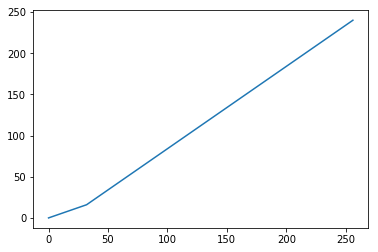

In [367]:
b_plot = b[:]
b_plot = [0] + b_plot
plt.plot(a, b_plot)
plt.show()

In [143]:
a

[0, 32, 64, 96, 128, 160, 192, 224, 256]

In [145]:
b_plot

[0, 16, 48, 80, 112, 144, 176, 208, 240]

In [174]:
len(a)

9

In [175]:
len(b)

8

In [334]:
3 ** 2 * 4 == 36

True